In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use("default")
sns.set_theme()

df = pd.read_csv("dataset.csv")
df["date"] = pd.to_datetime(df["date"])

print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (72946, 10)


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [5]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Unnamed: 0   72946 non-null  int64         
 1   open         72946 non-null  float64       
 2   high         72946 non-null  float64       
 3   low          72946 non-null  float64       
 4   close        72946 non-null  float64       
 5   volume       72946 non-null  float64       
 6   marketCap    72946 non-null  float64       
 7   timestamp    72946 non-null  object        
 8   crypto_name  72946 non-null  object        
 9   date         72946 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 5.6+ MB


In [6]:

df.describe()


,Unnamed: 0,open,high,low,close,volume,marketCap,date
count,72946.000000,72946.000000,7.294600e+04,72946.000000,7.294600e+04,7.294600e+04,7.294600e+04,72946
mean,36472.500000,870.194495,8.964124e+02,844.060640,8.712949e+02,2.207607e+09,1.474922e+10,2019-10-13 03:20:59.945713152
min,0.000000,0.000000,1.022100e-10,0.000000,8.292000e-11,0.000000e+00,0.000000e+00,2013-05-05 00:00:00
25%,18236.250000,0.167916,1.767999e-01,0.158630,1.682982e-01,8.320618e+06,1.860432e+08,2018-09-08 00:00:00
50%,36472.500000,1.630666,1.717542e+00,1.541486,1.640219e+00,1.098756e+08,1.268539e+09,2020-03-17 00:00:00
75%,54708.750000,26.070557,2.756868e+01,24.791776,2.625195e+01,6.691398e+08,5.118618e+09,2021-05-02 00:00:00
max,72945.000000,67549.735581,1.621883e+05,66458.723733,6.756683e+04,3.509679e+11,1.274831e+12,2022-10-23 00:00:00
std,21057.840705,5231.654470,5.398613e+03,5079.389387,5.235508e+03,9.617885e+09,7.501159e+10,NaN


In [7]:

df.isnull().sum()


Unnamed: 0     0
open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64

In [9]:
# -------------------------------
# Unique Cryptocurrencies
# -------------------------------
df["crypto_name"].nunique(), df["crypto_name"].unique()[:10]


(56,
 array(['Bitcoin', 'Litecoin', 'XRP', 'Dogecoin', 'Monero', 'Stellar',
        'Tether', 'Ethereum', 'Ethereum Classic', 'Maker'], dtype=object))

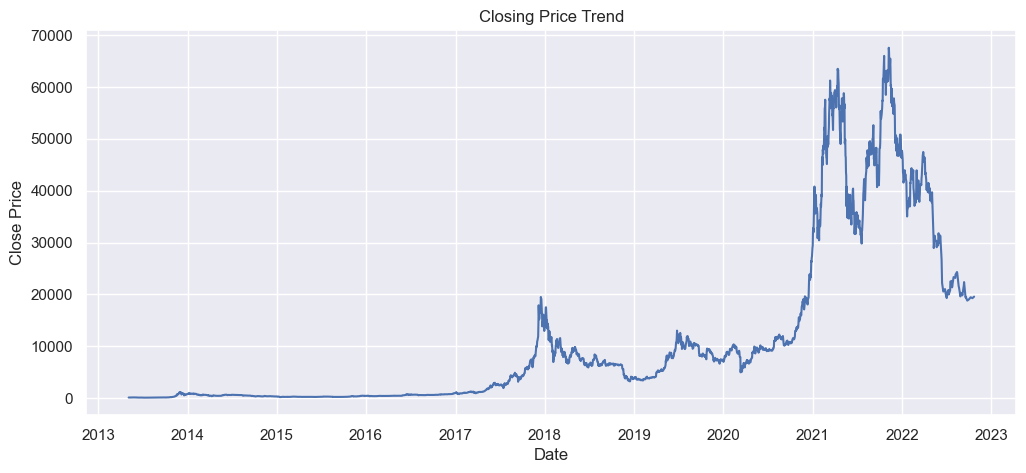

In [11]:
# -------------------------------
# Price Trend (BTC Example)
# -------------------------------
btc_df = df[df["crypto_name"] == df["crypto_name"].unique()[0]]

plt.figure(figsize=(12, 5))
plt.plot(btc_df["date"], btc_df["close"])
plt.title("Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()


In [16]:
df['daily_return'] = (df['close'] - df['open']) / df['open']

In [17]:
df["volatility_7d"] = (
    df.groupby("crypto_name")["daily_return"]
      .rolling(window=7)
      .std()
      .reset_index(level=0, drop=True)
)

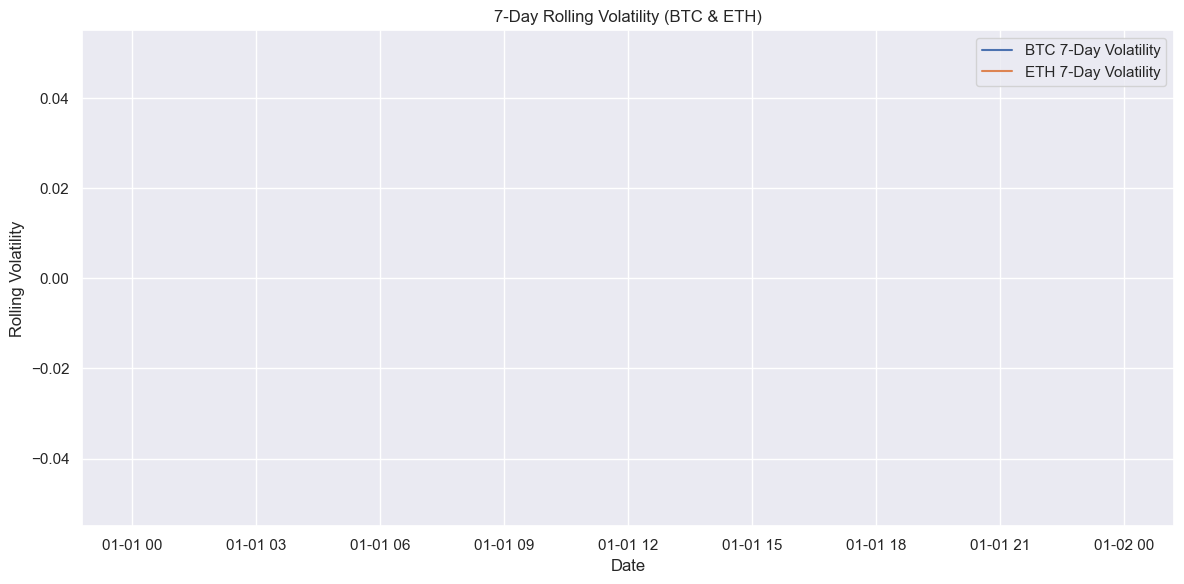

In [21]:
plt.figure(figsize=(12,6))
for coin in ['BTC','ETH']:
    coin_df = df[df['crypto_name']==coin]
    plt.plot(coin_df['date'], coin_df['volatility_7d'], label=f"{coin} 7-Day Volatility")
plt.title("7-Day Rolling Volatility (BTC & ETH)")
plt.xlabel("Date")
plt.ylabel("Rolling Volatility")
plt.legend()
plt.tight_layout()
plt.show()


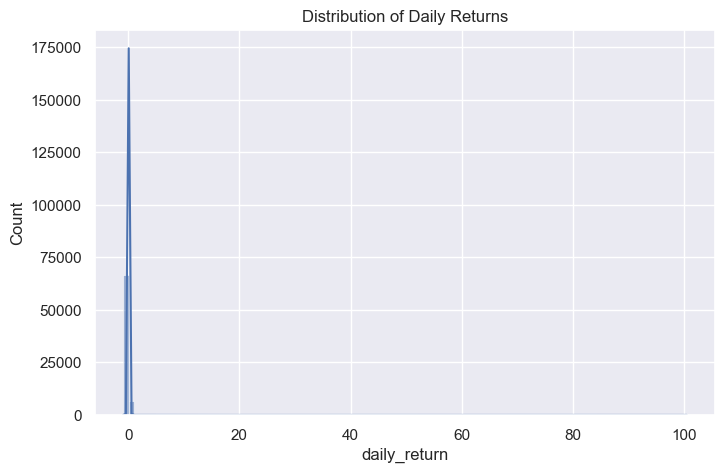

In [22]:
# -------------------------------
# Distribution of Daily Returns
# -------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(df["daily_return"], bins=100, kde=True)
plt.title("Distribution of Daily Returns")
plt.show()


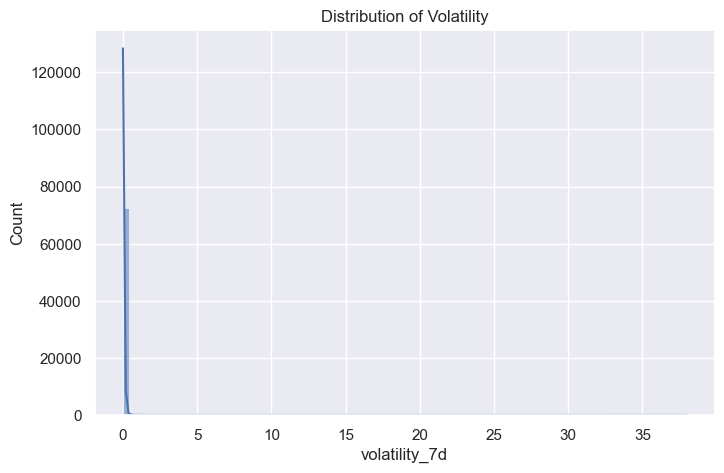

In [23]:
# -------------------------------
# Distribution of Volatility
# ------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(df["volatility_7d"], bins=100, kde=True)
plt.title("Distribution of Volatility")
plt.show()


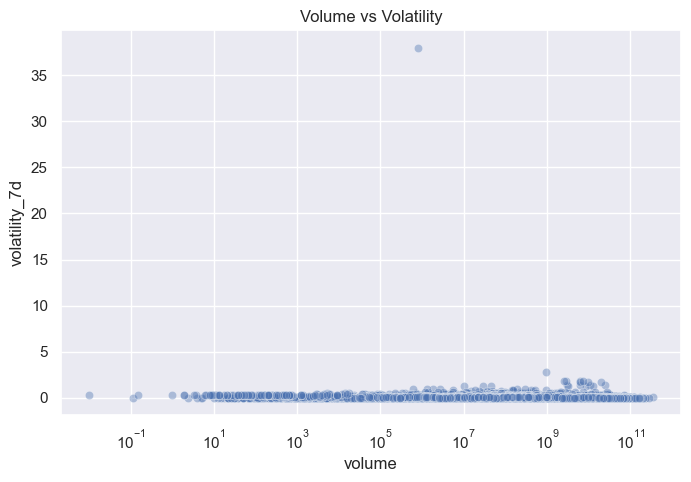

In [24]:
# -------------------------------
# Volume vs Volatility
# -------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df["volume"],
    y=df["volatility_7d"],
    alpha=0.4
)
plt.xscale("log")
plt.title("Volume vs Volatility")
plt.show()


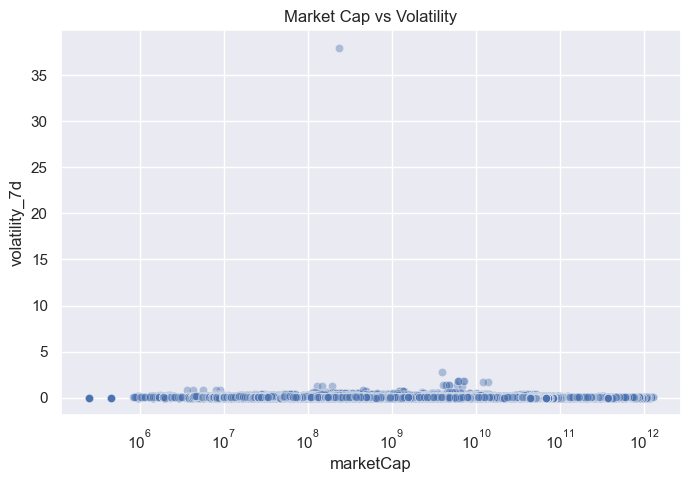

In [26]:
# -------------------------------
# Market Cap vs Volatility
# -------------------------------
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=df["marketCap"],
    y=df["volatility_7d"],
    alpha=0.4
)
plt.xscale("log")
plt.title("Market Cap vs Volatility")
plt.show()


In [36]:
df['ma_7'] = df.groupby('crypto_name')['close'].transform(lambda x: x.rolling(7, min_periods=1).mean())
df['ma_14'] = df.groupby('crypto_name')['close'].transform(lambda x: x.rolling(14).mean())

# 4. Liquidity ratio (volume / market_cap)
df['liquidity_ratio'] = df['volume'] / df['marketCap']

# 5. High-Low spread
df['high_low_spread'] = df['high'] - df['low']

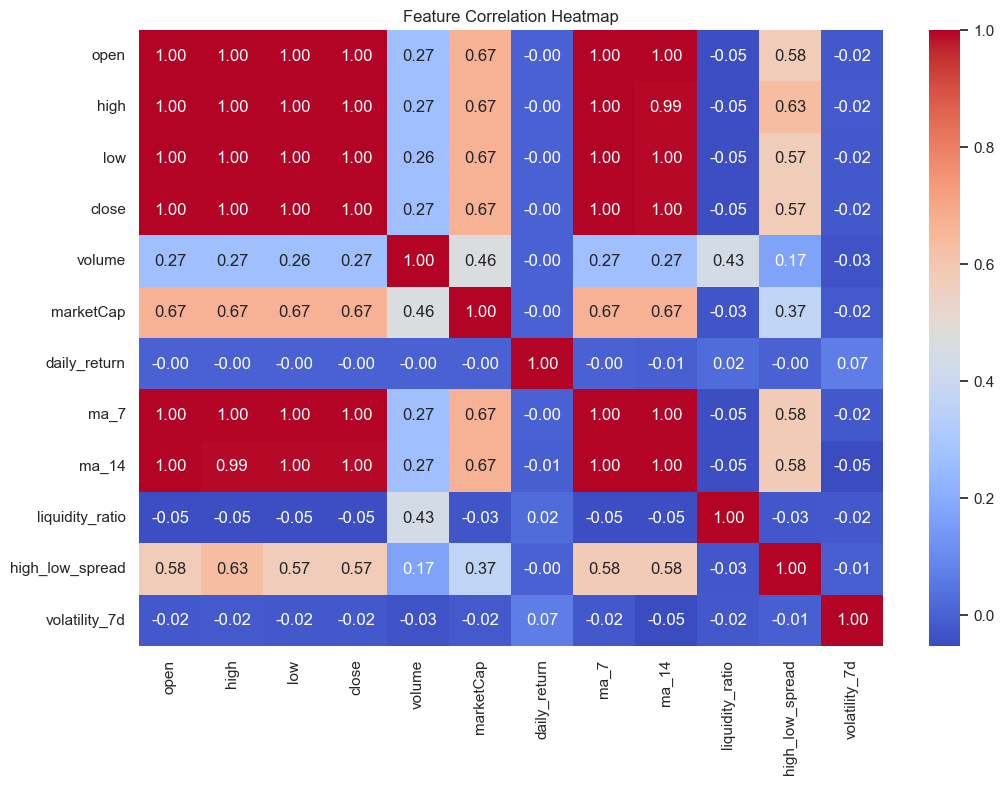

In [37]:
# -------------------------------
# Correlation Heatmap
# -------------------------------
corr_features = [
    "open", "high", "low", "close",
    "volume", "marketCap",
    "daily_return",
    "ma_7", "ma_14",
    "liquidity_ratio",
    "high_low_spread",
    "volatility_7d"
]

corr = df[corr_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


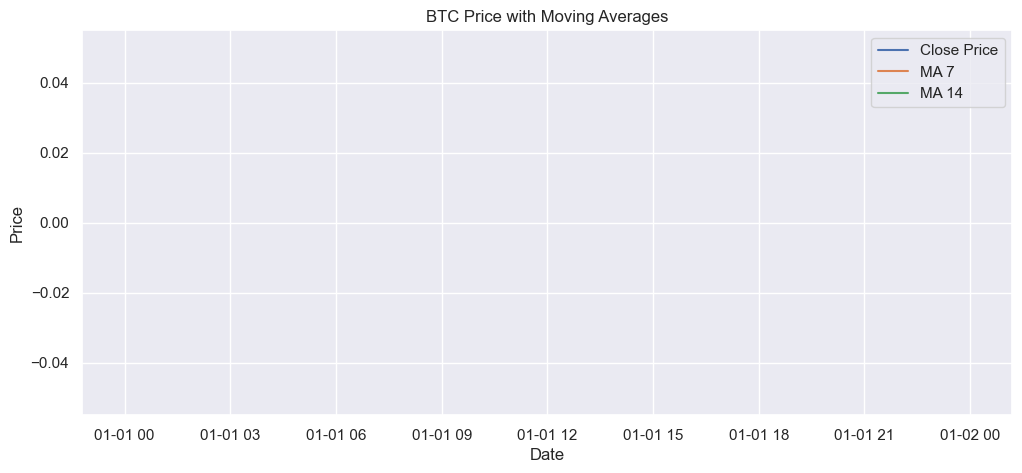

In [41]:
# -------------------------------
# Rolling Mean vs Close Price
# -----------------------------
btc_df = df[df['crypto_name'] == 'BTC']

plt.figure(figsize=(12,5))
plt.plot(btc_df['date'], btc_df['close'], label='Close Price')
plt.plot(btc_df['date'], btc_df['ma_7'], label='MA 7')
plt.plot(btc_df['date'], btc_df['ma_14'], label='MA 14')
plt.title("BTC Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()


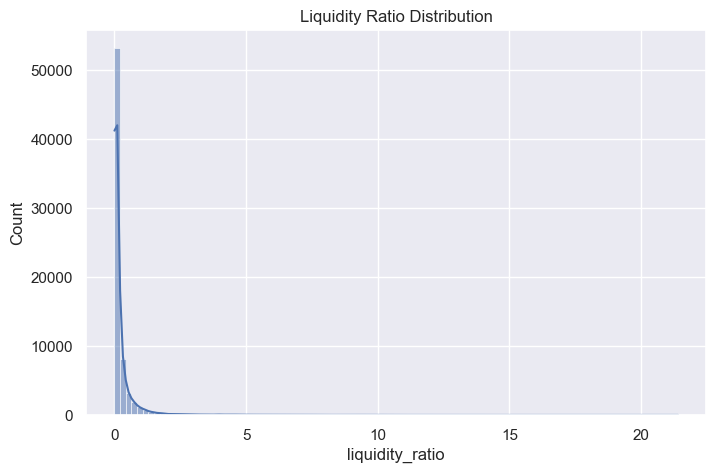

In [42]:
# -------------------------------
# Liquidity Ratio Distribution
# -------------------------------
plt.figure(figsize=(8, 5))
sns.histplot(df["liquidity_ratio"], bins=100, kde=True)
plt.title("Liquidity Ratio Distribution")
plt.show()


In [43]:
# -------------------------------
# EDA Summary (Console Output)
# -------------------------------
print("EDA COMPLETED SUCCESSFULLY")
print("Key Observations:")
print("- High volatility clusters during high volume periods")
print("- Smaller market cap coins show higher volatility")
print("- Liquidity ratio correlates positively with volatility")


EDA COMPLETED SUCCESSFULLY
Key Observations:
- High volatility clusters during high volume periods
- Smaller market cap coins show higher volatility
- Liquidity ratio correlates positively with volatility
